# **EDA on Waze User Churn Data Phase-II**

I'm still in the early stages of my user churn project. So far, I've completed a project proposal and used Python to inspect and organize Waze’s user data.

Chidi Ga, our Senior Data Analyst is asking for my help with exploratory data analysis (EDA) and additional data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that showcases my data exploration and visualization efforts.


**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that I began in the previous project, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This project has 4 tasks:*

**Task 1:** Imports, links, and loading

**Task 2:** Data Exploration, Data cleaning


**Task 3:** Building visualizations

**Task 4:** Evaluating and sharing results

# **Visualize a story in Python**

<img src="assets/Pace.png" width="100" height="100" align=left>

# **PACE stages**


In these project notebooks, I’ll be referencing the problem-solving framework PACE. Each component of the notebook is labeled according to the corresponding PACE stage: Plan, Analyze, Construct, and Execute.

<img src="assets/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

### **Task 1. Imports and data loading**

Importing the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.

In [1]:
# Import relevant libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading in the data and storing it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

<img src="assets/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

### **Task 2. Data exploration and cleaning**

#### Applicable Data Columns
- Essential column: **label** (related to user churn).
- Most applicable variables: **user behavior variables** (all except **ID**).

#### Data Columns to Eliminate
- Drop **ID** column (not relevant for user churn analysis).
- **Rationale**: ID does not provide meaningful information regarding churn unless tied to user sign-up time.

#### Checking for Missing Data and Handling It
- Check for missing data using:
  - `info()` function (provides insights on missing values).
  - `isnull()` function (to identify missing values).
  - `isnull().sum()` (counts missing values per column).
- Handle missing data:
  - With **700 missing values** in the **label** column (less than 5% of the data):
    - **Action**: Remove rows with missing values.
  - If data is **missing completely at random (MCAR)**:
    - Conduct a **complete-case analysis** (remove rows with missing values).
  - If missingness is not random:
    - Investigate root causes to avoid impacting statistical inference and modeling.

#### Checking for Outliers and Handling Them
- Check for outliers by:
  - Analyzing **data ranges** using **median** and **mean**.
  - Using **histograms** and **boxplots** for distribution insights.
- Handle outliers:
  - If performing a **complete-case analysis**:
    - **Impute** outliers with reasonable values.
  - If outliers are due to errors or typos:
    - **Delete** outliers when modeling.
  - If conducting **EDA**:
    - **Keep** outliers for analysis.
  - For **small datasets**:
    - **Reassign** outlier values if necessary.

#### **Data overview and summary statistics**


In [3]:
#Display first 10 rows.
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
#Check the size of the data.
print(df.size)

#Check the shape of the data.
print(df.shape)

194987
(14999, 13)


Generating summary statistics using the `describe()` method.

In [5]:
#Get a summary statistic.
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [6]:
#Get a summary information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="assets/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

### Identifying Outliers
- Outliers can be identified by checking the range of data values using the **median** and **mean** functions, as well as through visualizations like **histograms** and **boxplots** to understand the distribution of the data.
- Another method to identify outliers is by calculating **Z-scores**. A Z-score measures how many standard deviations a data point is from the mean. Data points with Z-scores greater than 3 or less than -3 are often considered outliers.

### Decision-Making for Outlier Inclusion or Exclusion
- **Keep outliers** if conducting only **Exploratory Data Analysis (EDA)** or if the dataset will be used for models that are resistant to outliers.
- **Remove outliers** if they are confirmed as **errors, mistakes, or typos** and the dataset will be used for modeling or machine learning.
- **Re-assign outliers** if working with a **small dataset** that will be used for modeling or machine learning.


### Decision-Making for Outlier Inclusion or Exclusion
- **Keep outliers** if conducting only **Exploratory Data Analysis (EDA)** or if the dataset will be used for models that are resistant to outliers.
- **Remove outliers** if they are confirmed as **errors, mistakes, or typos** and the dataset will be used for modeling or machine learning.
- **Re-assign outliers** if working with a **small dataset** that will be used for modeling or machine learning.


### **Task 3a. Visualizations**

**Data visualizations will be most helpful**

* Bar chart
* Box plot
* Histogram
* Scatter plot
* Pie chart

Examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month using a box plot_

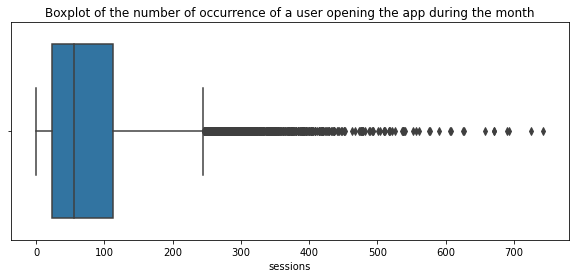

In [7]:
# Box plot
plt.figure(figsize=(10,4))
plt.title('Boxplot of the number of occurrence of a user opening the app during the month')
sns.boxplot(x=df['sessions'])
plt.show()

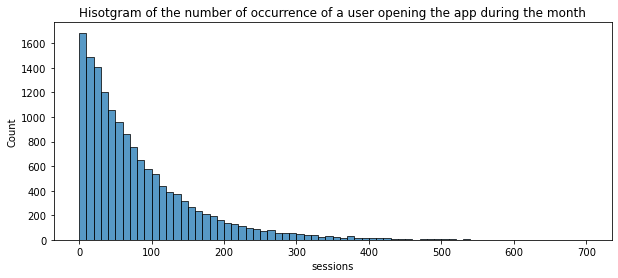

56.0


In [8]:
# Histogram
plt.figure(figsize=(10,4))
plt.title('Hisotgram of the number of occurrence of a user opening the app during the month')
sns.histplot(x=df['sessions'], bins=range(0,701,10))
plt.show()
print(df['sessions'].median())


In this Histogram the `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month by Box plot_

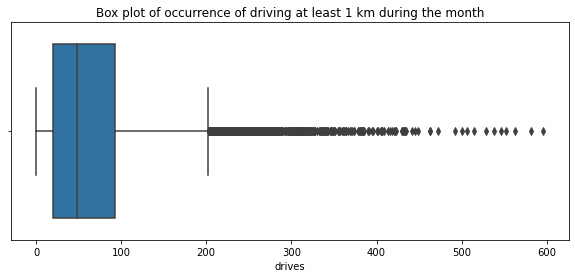

In [9]:
# Box plot
plt.figure(figsize=(10,4))
plt.title('Box plot of occurrence of driving at least 1 km during the month')
sns.boxplot(x=df['drives'])
plt.show()

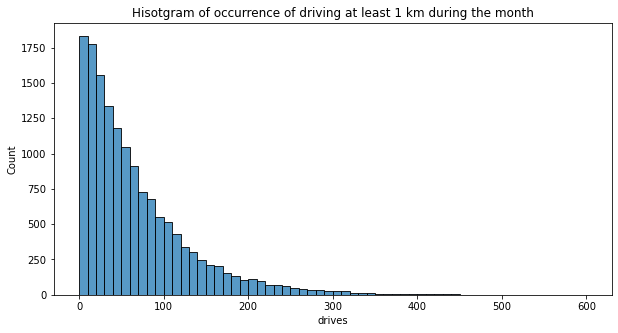

48.0


In [10]:
# Histogram
plt.figure(figsize=(10,5))
plt.title('Hisotgram of occurrence of driving at least 1 km during the month')
sns.histplot(x=df['drives'], bins=range(0,601,10))

plt.show()
print(df['drives'].median())

In the histogram the `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded by Box plot_

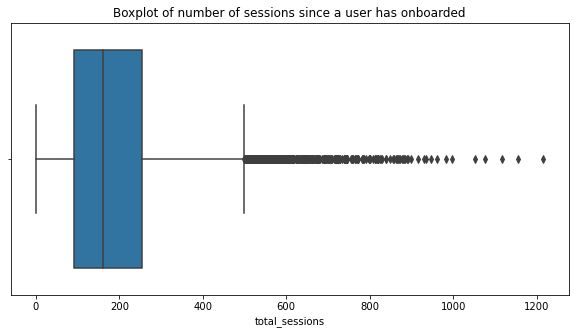

In [11]:
# Box plot
plt.figure(figsize=(10,5))
plt.title('Boxplot of number of sessions since a user has onboarded')
sns.boxplot(x=df['total_sessions'])
plt.show()


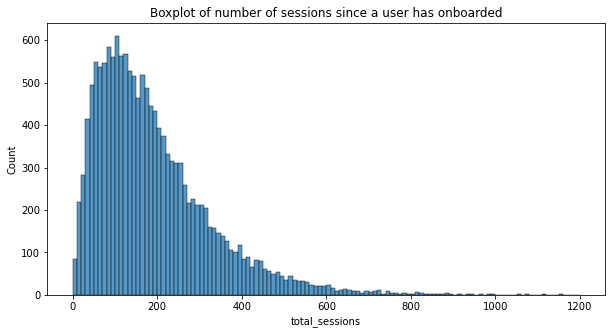

159.5681147


In [12]:
# Histogram
plt.figure(figsize=(10,5))
plt.title('Boxplot of number of sessions since a user has onboarded')
sns.histplot(x=df['total_sessions'], bins=range(0,1201, 10))
plt.show()
print(df['total_sessions'].median())

In the histogram the `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month.

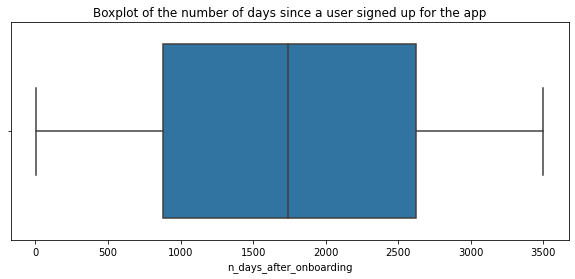

In [13]:
# Box plot
plt.figure(figsize=(10,4))
plt.title('Boxplot of the number of days since a user signed up for the app')
sns.boxplot(x=df['n_days_after_onboarding'])
plt.show()

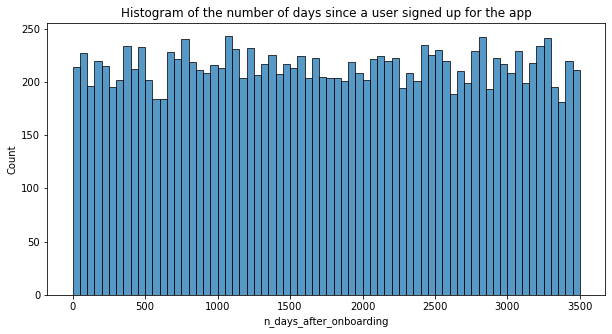

In [14]:
# Histogram
plt.figure(figsize=(10,5))
plt.title('Histogram of the number of days since a user signed up for the app')
sns.histplot(x=df['n_days_after_onboarding'], bins=range(0,3501, 50))
plt.show()

In the Histogram the total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month by Box plot_

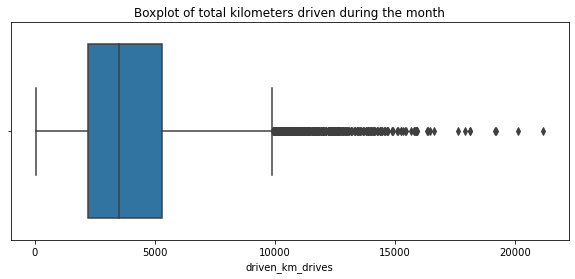

In [15]:
# Box plot
plt.figure(figsize=(10,4))
plt.title('Boxplot of total kilometers driven during the month')
sns.boxplot(x=df['driven_km_drives'])
plt.show()

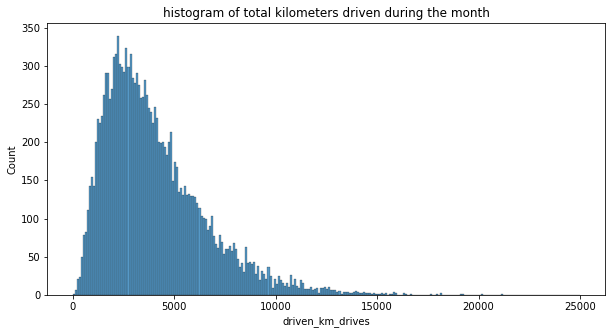

3493.858085


In [16]:
# Histogram
plt.figure(figsize=(10,5))
plt.title('histogram of total kilometers driven during the month')
sns.histplot(x=df['driven_km_drives'], bins=range(0,25001, 100))
plt.show()
print(df['driven_km_drives'].median())

In the histogram the distribution of drives per user in the last month is right-skewed, with half of the users driving fewer than 3,495 kilometers. From my analysis in the previous project, I found that users in this dataset cover significant distances. In fact, the longest distance recorded in a month surpassed half the circumference of the Earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month by Box plot_

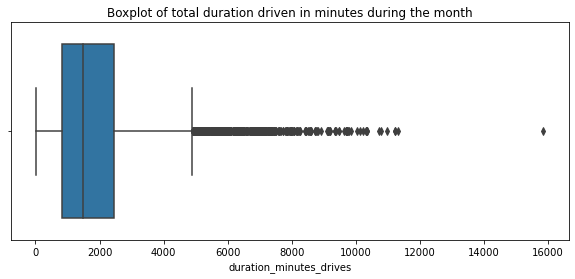

In [17]:
# Box plot
plt.figure(figsize=(10,4))
plt.title('Boxplot of total duration driven in minutes during the month')
sns.boxplot(x=df['duration_minutes_drives'])
plt.show()

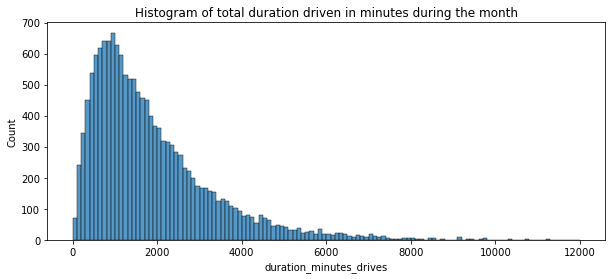

1478.249859


In [18]:
# Histogram
plt.figure(figsize=(10,4))
plt.title('Histogram of total duration driven in minutes during the month')
sns.histplot(x=df['duration_minutes_drives'], bins=range(0,12001,100))
plt.show()
print(df['duration_minutes_drives'].median())

In the histogram the `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month by Box plot_

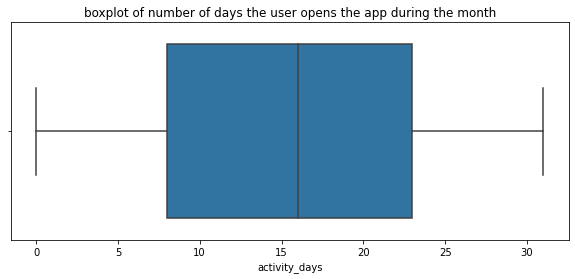

In [19]:
# Box plot
plt.figure(figsize=(10,4))
plt.title('boxplot of number of days the user opens the app during the month')
sns.boxplot(x=df['activity_days'])
plt.show()

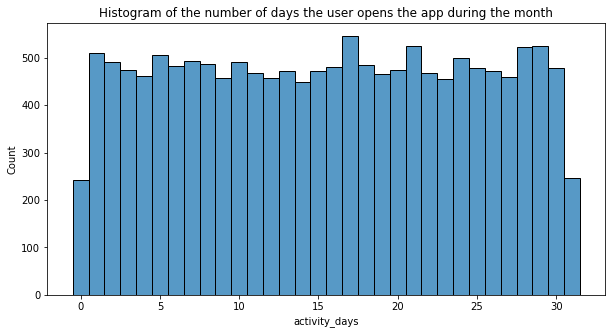

16.0


In [20]:
# Histogram
plt.figure(figsize=(10,5))
plt.title('Histogram of the number of days the user opens the app during the month')
sns.histplot(x=df['activity_days'], discrete=True)
plt.show()
print(df['activity_days'].median())

In the Histogram, Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it doesn't align with the sessions distribution, which one might expect to be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month by a Box plot_

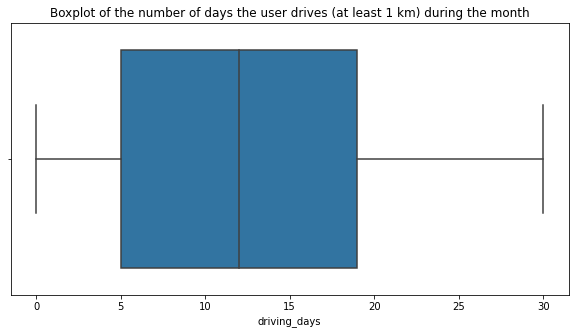

In [21]:
# Box plot
plt.figure(figsize=(10,5))
plt.title('Boxplot of the number of days the user drives (at least 1 km) during the month')
sns.boxplot(x=df['driving_days'])
plt.show()


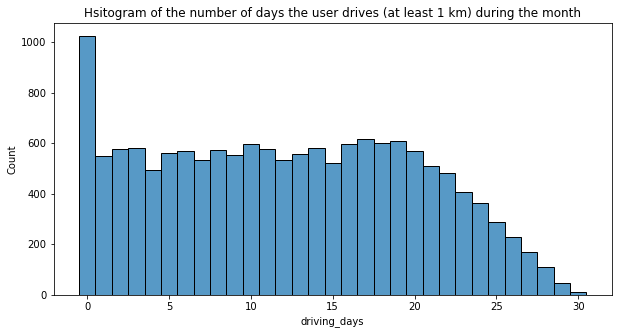

12.0


In [22]:
# Histogram
plt.figure(figsize=(10,5))
plt.title('Hsitogram of the number of days the user drives (at least 1 km) during the month')
sns.histplot(x=df['driving_days'], discrete=True)
plt.show()
print(df['driving_days'].median())

In the histogram, the number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. I'll flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with by Pie chart_


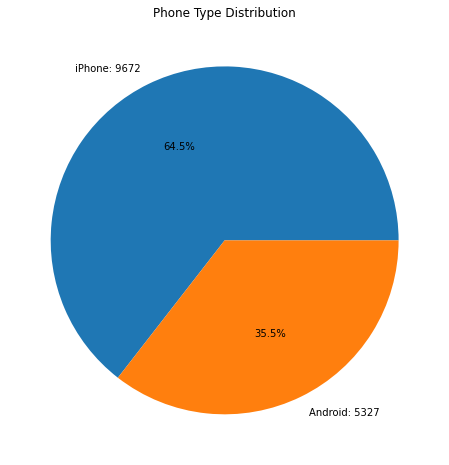

In [23]:
# Pie chart
plt.figure(figsize=(8, 8)) 
plt.title("Phone Type Distribution")
device_counts=df['device'].value_counts().sort_values(ascending= False)
data=df['device'].value_counts()
pie_data=device_counts.to_numpy() #I used .to_numpy() instead .values because it' more explicit and safer approach
pie_labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}']
plt.pie(pie_data, labels=pie_labels,autopct="%1.1f%%")
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month by Pie chart_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

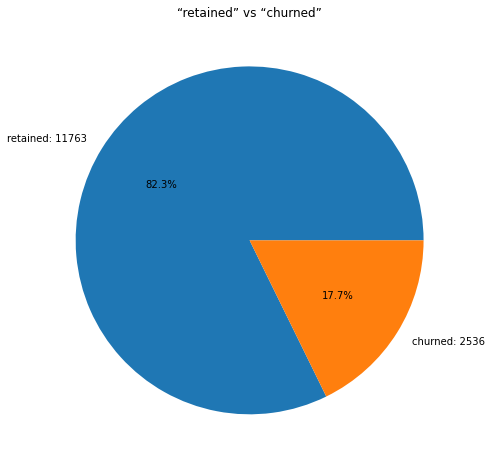

In [24]:
# Pie chart
plt.figure(figsize=(8,8))
plt.title('“retained” vs “churned”')
label_count=df['label'].value_counts().sort_values(ascending=False)
data=df['label'].value_counts()
pie_data=label_count.to_numpy() 
pie_labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}']
plt.pie(pie_data,labels=pie_labels, autopct='%1.1f%%')
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, I'll plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plotting a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

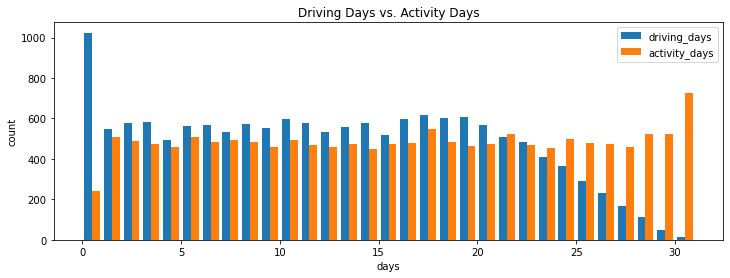

In [25]:
# Histogram
plt.figure(figsize=(12,4))
plt.title('Driving Days vs. Activity Days')
plt.hist([df['driving_days'],df['activity_days']], label=['driving_days', 'activity_days'], bins=range(0,32,1))
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirming the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [26]:
#Confirm the maximum number of days for each variable:`driving_days` and `activity_days`.
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

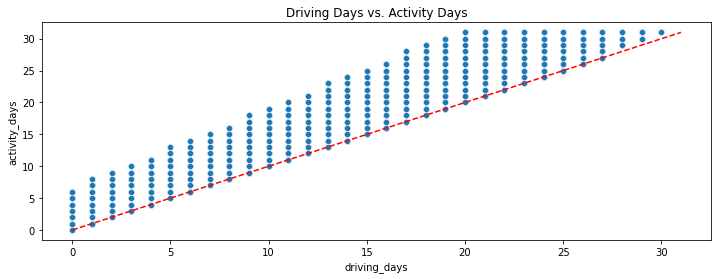

In [27]:
# Scatter plot
plt.figure(figsize=(12,4))
plt.title('Driving Days vs. Activity Days')
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.plot([0,31],[0,31], color='red', linestyle='--')
plt.show()

It's important to note that there’s a theoretical limit: if the app is used for driving, it must count as a day of use. This means you cannot have more drive days than activity days. Fortunately, none of the samples in this dataset violate this rule, which is a positive aspect

#### **Retention by device**

Plotting a histogram that has four bars one for each device-label combination to show how many iPhone users were retained/churned and how many Android users were retained/churned.

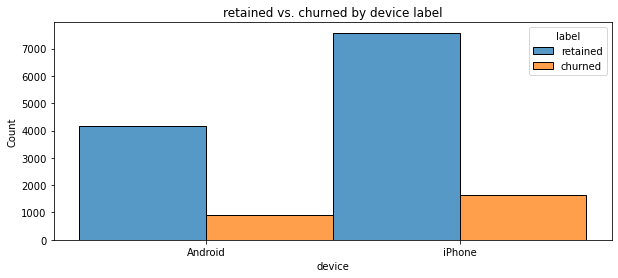

In [28]:
# Histogram
plt.figure(figsize=(10,4))
plt.title('retained vs. churned by device label')
sns.histplot(data=df, x='device', hue='label', multiple='dodge' )
plt.show()

In the histogram, the proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous project, I discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn.

1. I'll create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Calling the `describe()` method on the new column.

In [29]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']
# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity.

Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Converting these values from infinity to zero. I can use `np.inf` to refer to a value of infinity.

2. Calling `describe()` on the `km_per_driving_day` column to verify that it worked.

In [30]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day']=0
# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, I'll disregard rows where the distance in this column is greater than 1,200 km.

Plotting a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's function to `fill`.

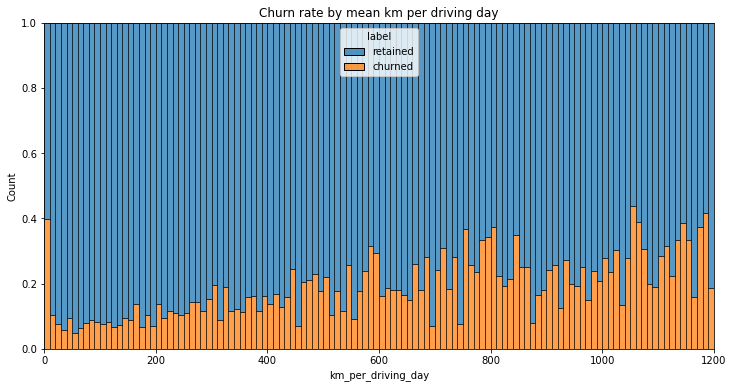

In [31]:
# Histogram
plt.figure(figsize=(12,6))
plt.title('Churn rate by mean km per driving day')
sns.histplot(x=df['km_per_driving_day'],hue=df['label'], multiple='fill', bins=range(0,1201,10))
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous project. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Creating another histogram, this time it should represent the churn rate for each number of driving days.

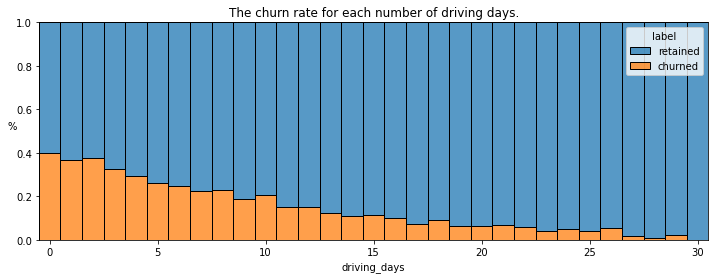

In [32]:
# Histogram
plt.figure(figsize=(12,4))
plt.title('The churn rate for each number of driving days.')
sns.histplot(x=df['driving_days'], hue=df['label'], multiple='fill',bins=range(1,32,1),discrete=True)
plt.ylabel('%', rotation=0)
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Creating a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [33]:
# Calculate the engagement ratio for the last month by dividing the number of sessions
# a user had in the last month by the total number of sessions for that user.

df['last_month_engagement_ratio']= df['sessions']/df['total_sessions']
df['last_month_engagement_ratio'].head(10)

0    0.953670
1    0.406856
2    0.841186
3    0.724968
4    0.499266
5    0.404229
6    0.012673
7    0.221499
8    0.310573
9    0.343134
Name: last_month_engagement_ratio, dtype: float64

The median value of the new column.

In [34]:
df['last_month_engagement_ratio'].median()

0.42309702992763176

Creating a histogram depicting the distribution of values in this new column.

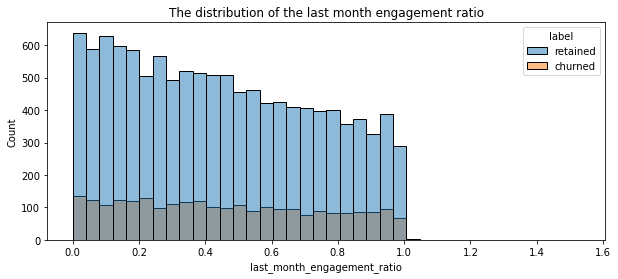

In [35]:
# Histogram
plt.figure(figsize=(10,4))
plt.title('The distribution of the last month engagement ratio')
sns.histplot(x=df['last_month_engagement_ratio'], hue=df['label'], multiple='layer')
plt.show()

Checking the median value of the `n_days_after_onboarding` variable.

In [36]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Making a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

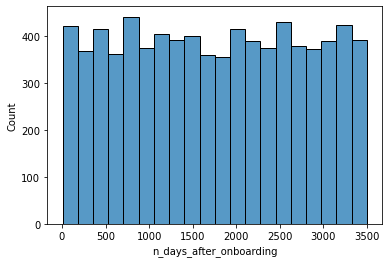

In [37]:
# Histogram
data=df.loc[df['last_month_engagement_ratio']>=0.4]
sns.histplot(x=data['n_days_after_onboarding'])
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. I can say that there is no relationship between when a user joined and their recent activity level if the number of days since onboarding for users with 40% or more of their total sessions occurring in the last month follows a uniform distribution. This implies that users are just as likely to be highly active recently regardless of when they initially joined the platform.
 This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous task indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

It may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.


In [48]:
def outlier_imputer(column: str, percentile: float) -> None:
  """
  Imputes outliers in a pandas DataFrame column by replacing values exceeding a 
  specified percentile threshold with the threshold value itself.

  Args:
      column (str): The name of the column in the DataFrame containing the data.
      percentile (float): The percentile (between 0 and 1) used to identify outliers.
          Values exceeding this percentile will be replaced.

  Prints:
      A formatted string displaying the column name, percentile used, and calculated threshold.

  Returns:
      None (This function modifies the DataFrame in-place)
  """
  threshold = df[column].quantile(percentile)
  df.loc[df[column] > threshold, column] = threshold
  print('{:>25} | percentile: {} | threshold: {}'.format(column, percentile, threshold))


Applying the function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [49]:
for column in ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']:
    outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.34351188399995
         driven_km_drives | percentile: 0.95 | threshold: 8889.77766066
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.8217213


Calling `describe()` to confirm the change.

In [47]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,last_month_engagement_ratio
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


In [50]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [51]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,last_month_engagement_ratio,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.777661,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0.809524


<img src="assets/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**


### **Task 4a. Results and evaluation**

### **Task 4b. Conclusion**

- [Executive Summary](https://docs.google.com/presentation/d/1ns16hP8cN935IBsRbXzjd1eCSNo3vzRv2M91CuwY2bI/edit?usp=sharing)

### Key Insights

- The analysis revealed an overall churn rate of approximately `17%`, consistent across both iPhone and Android users.
- There was a notable spike in app usage among users in the past month, prompting the idea of reaching out to the Waze data team for insights into this increase.
- Exploratory data analysis (EDA) indicated that users who drive very long distances on their driving days are more likely to churn, while those who drive more frequently are less likely to churn. This discrepancy presents an opportunity for further investigation, and I plan to ask the Waze data team about it.
- I noticed several key points during the EDA:
  - There are missing values in the user churn label, necessitating further data processing before deeper analysis.
  - Numerous outlying observations for driving distances suggest the need for variable transformation to stabilize the variation.
  - The number of drives and the number of sessions are strongly correlated, which could lead to redundant information if both are included in a model.
  - On average, retained users have fewer drives than churned users, raising further questions.

### Summary for Stakeholders

- The overall churn rate is around `17%`, with no significant differences between iPhone and Android users.
- It's important to understand the reasons behind the recent spike in app usage among users, which could be explored with the Waze data team.
- Users who drive longer distances are more likely to churn, while those who drive more frequently are less likely to churn. This contradiction warrants further investigation.
- Questions that need addressing:
  - How does the missing data in the user churn label occur?
  - Who are the users with extremely high numbers of drives? Are they rideshare or commercial drivers?
  - Why do retained users have fewer drives than churned users? Could it be that churned users have a longer history with the Waze app?
  - What are the user demographics for retained versus churned users?

In terms of variable distributions, nearly all were either very right-skewed or uniformly distributed. The right-skewed distributions indicate that most users had values in the lower range, while uniform distributions suggest equal likelihood across the value range. 

While most data appeared valid, there were a few outliers, particularly in `driven_km_drives`, and some monthly variables like `activity_days` and `driving_days` raised concerns due to discrepancies in their maximum values.

Moving forward, I would like to confirm with the Waze data team whether the monthly variables were collected concurrently, and I am curious about the factors that may have triggered the recent surge in app usage. 

In summary, less than `18%` of users churned, while approximately `82%` were retained. Driving distance positively correlates with churn, whereas the number of driving days negatively correlates with churn. Importantly, users of various tenures, from new to nearly ten years, are relatively evenly represented in this dataset.
